effectuer une tâche de classification sur les données médicales
- Identification et traitement de l'overfitting par le biais des CallsBacks Eraly Stop(arrêt anticipé) et des couches Drop out.
- Early stop: Technique pour arrêter automatiquement l'entrâinement en fonction d'une condition de perte sur les données de validation passées lors de l'appel model.fit()
- Drop out layers: un drop out layer peut être ajouté aux couches pour étiendre des neurones pendant l'entraînement afin d'éviter le surapprentissage
chaque couche drop out diminue d'un pourcentage d'unité de neurones définit par l'utilisateur dans la couche précédente, à chasue batch(lot)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importer le dataset
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

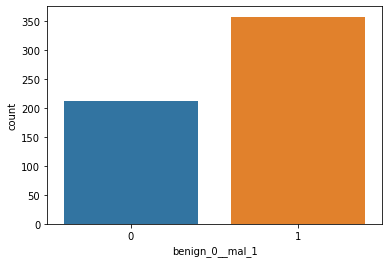

In [5]:
# Visualisation type pour les tâches de classification
# graph de comptage du label réel pour voir si il s'agit d'un problème équilibré ou non
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

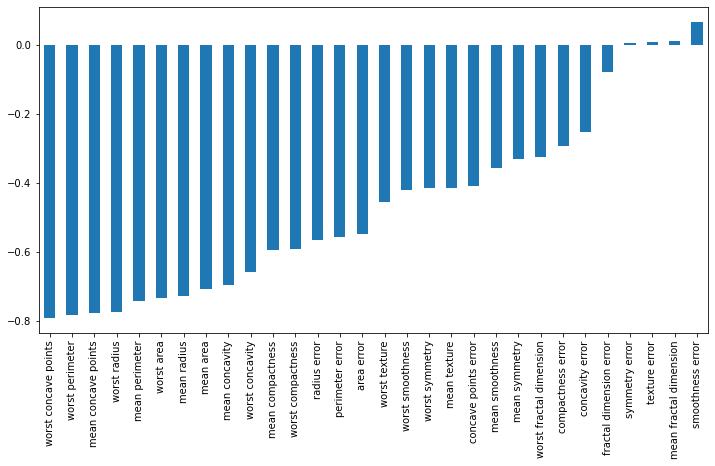

In [6]:
# vérification des corrélations ntre les features
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

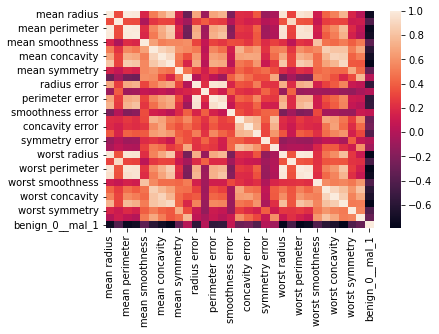

In [7]:
# voir la corrélation entre les features
plt.plot(figsize=(14,14))
sns.heatmap(df.corr())

In [8]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [9]:
# Séparation en données d'entraînement et données test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
# Application de scaling: mise à l'échelle des données
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Construction du modèle 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

2022-04-22 10:05:15.613354: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 10:05:15.613380: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
model=Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))
# Comme il s'agit d'une classification binaire, pour la couche de sortie on utilise  pour l'activation la fonction sigmoide
# on veut que ladernière activation soit une sigmoide: un neurone en sortie qui produira la valeur o ou 1 afin de décider à quelle classe la sortie apparient
# à savoir malin ou bénin
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

2022-04-22 10:05:24.853809: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 10:05:24.853845: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 10:05:24.853876: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hprisser): /proc/driver/nvidia/version does not exist
2022-04-22 10:05:24.854184: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Paramètres du Earlystopping pour l'arrêt anticipé:
 - montiror: contrôler la perte de validation
 - min_delta: changement minimu requis
 - patience: nombre d'epochs avec aucune amélioration avec le quel l'entrainement s'arrête
 - mode: c'est ce qu'on éssaie de faire: soit min: minimiser les éléments monitorés ex(la loss)
 - si notre métrique est une accuracy par exemple: on devrait maximiser
 - mode auto: direction automatiquement deviné à partir du nom de la mesure (chaîne de caractère)qui est monitoré

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
# patience= 25: signifie qu'on attend 25 epochs après avoir détecter une raison de stopper l'entraînement
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [15]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6877 - val_loss: 0.6686
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6733 - val_loss: 0.6499
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6603 - val_loss: 0.6330
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6411 - val_loss: 0.6102
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6136 - val_loss: 0.5821
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5989 - val_loss: 0.5528
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5792 - val_loss: 0.5241
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5633 - val_loss: 0.4967
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5268 - val_loss: 0.4653
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5168 - val_loss: 0.4375
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1027 - val_loss: 0.1125
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1146 - val_loss: 0.1159
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1035 - val_loss: 0.1403
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1064 - val_loss: 0.1149
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0982 - val_loss: 0.1103
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0999 - val_loss: 0.1115
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1160 - val_loss: 0.1233
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1209 - val_loss: 0.1189
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1157 - val_loss: 0.1243
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0931 - val_loss: 0.1130


In [16]:
# Tracer la perte 
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

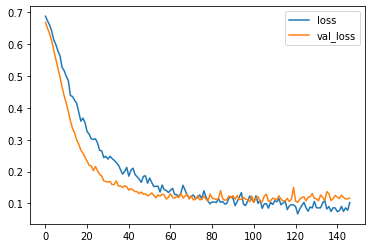

In [17]:
losses.plot()

In [18]:
# Prédiction
prediction=(model.predict(X_test)>0.5).astype('int32')# pour obtenir en sortie la bonne classe 0 ou 1
# pour obtenir nos valeurs de classes

# Evaluation du modèle

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [20]:
print(confusion_matrix(y_test,prediction))

[[54  1]
 [ 3 85]]
